# Demo of the operation of the trained system

Next we will show how is the functioning of our designed neruonal network. For this we will take the trained model, we will apply it on test data (blind during the learning and validation process) and its classification ability will be shown by means of a video.

In this notebook the complete process is presented, from the download of the video, its preprocessing, the conversion of the video into frames, the classification, and finally, the construction of the demonstrative video.

In the first section of code, some libraries are imported necessary for the use of the model and processing of the images. Then the previously trained model is loaded.

In [4]:
# Imports for Deep Learning
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

from skimage.io import imread, imshow, imread_collection, concatenate_images
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import pyplot as plt

!wget https://www.dropbox.com/s/x46u9ibdw5ph3t7/mini_asl_alphabet.zip
!unzip mini_asl_alphabet.zip
my_model=load_model('modelD.h5')

Because the data in the training were normalized, it is necessary to normalize the test data using the same methods. The use of dictionaries allows us to associate the values of the model class with the class values of the test data.

In [5]:
data_dir = "mini_asl_alphabet/asl_alphabet_train/"
target_size = (64, 64)
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, 
                                                     shuffle=False, subset="training",class_mode='categorical')

class_dictionary = train_generator.class_indices
print(class_dictionary)

Found 4216 images belonging to 29 classes.
{'nothing': 27, 'space': 28, 'A': 0, 'C': 2, 'B': 1, 'E': 4, 'D': 3, 'G': 6, 'F': 5, 'I': 8, 'H': 7, 'K': 10, 'J': 9, 'M': 12, 'L': 11, 'O': 14, 'N': 13, 'Q': 16, 'P': 15, 'S': 18, 'R': 17, 'U': 20, 'T': 19, 'W': 22, 'V': 21, 'Y': 24, 'X': 23, 'Z': 25, 'del': 26}


The next step is to take test images (labeled), normalize them and pass them through our trained model. The value of the prediction is placed on the image (green if the prediction is correct, or red if the prediction is incorrect).

F
5


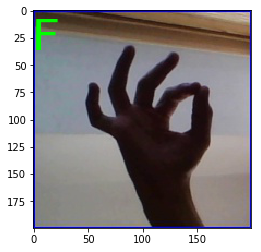

In [8]:
letter='F'
clase=class_dictionary[letter]
im=imread('mini_asl_alphabet/asl_alphabet_test/test/'+letter+'1_test.jpg')[:,:,:3]
img=im
im = Image.fromarray(im, 'RGB')
img2=im
im = im.resize((64,64))
im = np.array(im, dtype=np.float64) 
im =data_augmentor.standardize(im)
img_array = np.array(im)
img_array = np.expand_dims(img_array, axis=0)
prediction = (my_model.predict(img_array)[0])
prediction = np.argmax(prediction)
letter1=class_dictionary.keys()[class_dictionary.values().index(prediction)]
print(letter1)
print(prediction)

font = ImageFont.truetype("mini_asl_alphabet/arial.ttf", 40)
draw = ImageDraw.Draw(img2)
shadowcolor=(0,255,0)
if (clase!=prediction):
    shadowcolor=(255,0,0)    
draw.text((0,0),letter1, shadowcolor,font=font)
draw = ImageDraw.Draw(img2)
plt.imshow(img2, cmap=plt.cm.Greys_r);
#img2.save(letter+".png")

Below is a video with pictures of a complete alphabet. The correct operation of the model can be observed, only two characters were incorrectly classified (A and E).

<video controls src="mini_asl_alphabet/videotest.mp4" width="320" height="320" controls/> 

We recorded a video with a cell phone camera to discuss how our model would behave in a real application. In this segment of code we download the original video, we decompose it into images, we rotate it $90$ degrees (from horizontal to vertical), it is cut to leave only the part of the hand, and finally, we sub-sample it (from 30 fps to 10 fps) and reduce its resolution to $200 \times 200 $ pixels (same as training data).

This process may be delayed due to the size and resolution of the video and the different operations that must be performed. However, we have tested its execution in the virtual machine.

In [65]:
import cv2
from scipy import ndimage

!mkdir imagenesvideo
!wget https://www.dropbox.com/s/7au5h6gl2gop2ss/videoprueba.MOV
    
vidcap = cv2.VideoCapture('videoprueba.MOV')
success,image = vidcap.read()
print (image.shape)
count = 0
cuenta=0
cv2.imwrite("imagenesvideo/frame%d.jpg" % cuenta, image) 
while success:
    if count % 3==0:
        image = ndimage.rotate(image,-90)
        image=image[-360+640:640+360,:,:]
        image= cv2.resize(image,(200,200))
        cv2.imwrite("imagenesvideo/frame%d.jpg" % cuenta, image)     # save frame as JPEG file      
        cuenta+=1
    success,image = vidcap.read()
    count += 1

--2019-04-16 21:29:36--  https://www.dropbox.com/s/7au5h6gl2gop2ss/videoprueba.MOV
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7au5h6gl2gop2ss/videoprueba.MOV [following]
--2019-04-16 21:29:37--  https://www.dropbox.com/s/raw/7au5h6gl2gop2ss/videoprueba.MOV
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d5744f634f0a6927244773082.dl.dropboxusercontent.com/cd/0/inline/AfJjsAOtI59WdY3kicPQAOgA-aDC2IZkTlCl_IlVkO8J8NDTOx26qWDa62cqAGzw6uFAi_gl034dcHZhfALxxJP_VEq1BRTWlax768UIbO1E6ZZuZDUv3JL05B3UGefquMM/file# [following]
--2019-04-16 21:29:37--  https://uc9d5744f634f0a6927244773082.dl.dropboxusercontent.com/cd/0/inline/AfJjsAOtI59WdY3kicPQAOgA-aDC2IZkTlCl_IlVkO8J8NDTOx26qWDa62cqAGzw6uFAi_gl034dcHZhfALxxJP_VEq1BRTWlax768UIb

From the processed images our trained model is applied. The corresponding prediction is drawn on each image in green (in this case the data is blind and we do not have the labels), and they are stored in the folder *videoimagenes* as images in *png*.

In [66]:
!mkdir videoimagenes
for i in range (4302):
    im=imread('imagenesvideo/frame%d.jpg' % i)[:,:,:3]
    img=im
    im = Image.fromarray(im, 'RGB')
    img2=im
    im = im.resize((64,64))
    im = np.array(im, dtype=np.float64) 
    im =data_augmentor.standardize(im)
    img_array = np.array(im)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = (my_model.predict(img_array)[0])
    prediction = np.argmax(prediction)
    letter1=class_dictionary.keys()[class_dictionary.values().index(prediction)]

    font = ImageFont.truetype("mini_asl_alphabet/arial.ttf", 40)
    draw = ImageDraw.Draw(img2)
    shadowcolor=(0,255,0)  
    draw.text((0,0), letter1, shadowcolor,font=font)
    draw = ImageDraw.Draw(img2)
    img2.save('videoimagenes/frame%d.png' % i)

Finally, we created a new video with the images with the predictions given by the model. The *getfiles* function is created to sort the files according to their creation date. The biggest difficulty in this part is in the correct functioning of the video codecs (in this case we have chosen to install the library *ffmpeg*). The video is saved in compressed format *mp4* and at a speed of 30 fps.

In [140]:
!pip install ffmpeg
import os

fourcc=cv2.VideoWriter_fourcc(*'mp4v')
def getfiles(dirpath):
    a = [s for s in os.listdir(dirpath)
         if os.path.isfile(os.path.join(dirpath, s))]
    a.sort(key=lambda s: os.path.getmtime(os.path.join(dirpath, s)))
    return a
image_folder="videoimagenes"
files=getfiles(image_folder)

video_name = 'video3.mp4'

images = [img for img in files if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, fourcc, 30, (width,height),True)

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Final result is presented in next video:

<video controls src="mini_asl_alphabet/video2.mp4" width="320" height="320" controls/> 

Although the final result in this test is not as satisfactory as in the validation phase, acceptable behavior can be observed. There are several aspects that must be kept in mind: the training database has biases and little variability, the training data set is relatively small, we do not know exactly which are descriptors of the images that the classifier ponders and several of the symbols present great similarity.

In order to improve the behavior of the model in test, we propose as future work: expand the test database, improve the variability of the information and use semantical segmentation techniques to eliminate the background of the images and use preprocessing techniques in the images, such as *white patch*, to eliminate effects of luminosity and predominance of a color channel. In this way it is expected to improve the results of the test classification.

![title](https://pbs.twimg.com/media/D4MNMBhWAAEsVoq.png)
